In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
# get iris dataset
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
# create object of label encoder
encoder = LabelEncoder()
# apply on output column
data['species']=encoder.fit_transform(data['species'])
# after transformation data
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
35,5.0,3.2,1.2,0.2,0
141,6.9,3.1,5.1,2.3,2
2,4.7,3.2,1.3,0.2,0
61,5.9,3.0,4.2,1.5,1
138,6.0,3.0,4.8,1.8,2


In [58]:
# seperate data in independent and dependent columns
x=data.iloc[:,:-3]
y=data.iloc[:,-1]

In [59]:
# split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
# create object of Logistic Regression model with "one-versus-rest"
lg=LogisticRegression(multi_class='ovr')
# apply model on training data
lg.fit(x_train, y_train)
# make prediction on testing data
y_pred=lg.predict(x_test)
# check accuracy of model
accuracy_score(y_test, y_pred)

0.868421052631579

In [60]:
# confusion matrics
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0,  7,  4],
       [ 0,  1, 11]])

In [61]:
# confusion matrics convert into dataframe
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,15,0,0
1,0,7,4
2,0,1,11


In [63]:
# predict query
query=np.array([[3.4,2.7]])
# compute probability for given query
lg.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.69385556, 0.30393455, 0.00220988]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


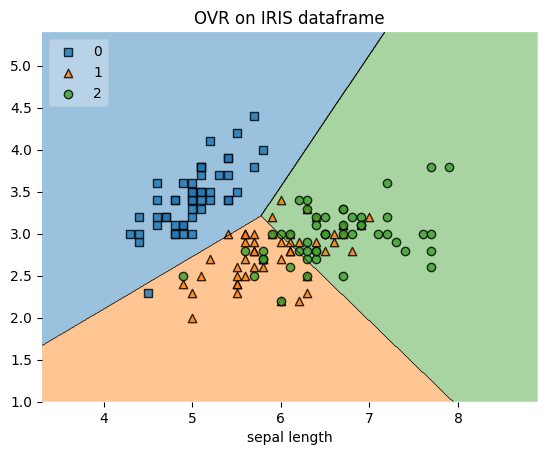

In [67]:
# plot Decision Region Function
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values,  clf=lg, legend=2, )
# annotation
import matplotlib.pyplot as plt
plt.xlabel('sepal length')
plt.title('OVR on IRIS dataframe')
plt.show()